In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import plot_model

Using TensorFlow backend.


In [2]:
np.arange(0, 10000, 2)

array([   0,    2,    4, ..., 9994, 9996, 9998])

In [3]:
xdata= np.arange(0, 10000, 2)
xdata.shape[0]

5000

In [4]:
# create data set.
# take last 3 data (lookback) to predict the fourth data.
# so x have timestep of 3 as it have 3 data and the y have 1 data
# x = [0, 2, 4]  # 3 data in x
# y = 6  # 1 data that to be predicted is y

In [5]:
def create_data(data):
    x = []
    y = []
    lookback = 3  # it is not index it is count of timestep
    for i in range(len(data)-lookback):
        current_timestep = data[i:i+3]
        x.append(current_timestep)
        y.append(data[i+3])
    return x, y

In [6]:
x, y = create_data(xdata)

In [7]:
x = np.array(x,dtype=np.float32)
y = np.array(y,dtype=np.float32)

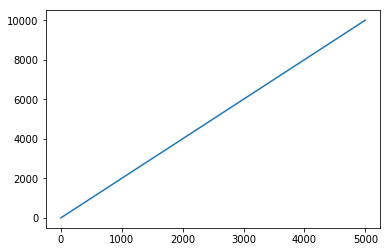

In [8]:
plt.plot(y)

In [9]:
# splitting data
from sklearn.model_selection import train_test_split

In [10]:
trainx, testx, trainy, testy = train_test_split(x, y, random_state=43, shuffle=False)

In [11]:
# we are going without scaling`

In [12]:
# we need to reshape our data in form of [batch_size, embed_vector_size_or_lookback_size_or_timestep, no.of_feature]
# in our case we have only one feature

In [13]:
def reshape(x):
    return np.reshape(x,[-1, 3, 1])

In [14]:
trainx = reshape(trainx)
testx = reshape(testx)

In [15]:
from tensorflow import keras as tfk
from tensorflow.keras.layers import *

In [16]:
model = tfk.Sequential()
model.add(LSTM(units=30, activation='tanh', return_sequences=True))
model.add(LSTM(30, activation='tanh', return_sequences=True))
# model.add(Dense(units=30, activation='tanh'))
# model.add(Dense(30, activation='tanh'))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

In [17]:
model.compile(optimizer='adam', loss="mean_squared_error", metrics=['accuracy'])

In [18]:
history = model.fit(trainx, trainy, epochs=500, verbose=1, validation_split=0.2, shuffle=False)

Train on 2997 samples, validate on 750 samples
Epoch 1/500
2997/2997 [==============================] - 4s 1ms/sample - loss: 11939098.0024 - accuracy: 0.0000e+00 - val_loss: 45396543.3173 - val_accuracy: 0.0000e+00
Epoch 2/500
2997/2997 [==============================] - 1s 197us/sample - loss: 11684119.1951 - accuracy: 0.0000e+00 - val_loss: 44649769.5467 - val_accuracy: 0.0000e+00
Epoch 3/500
2997/2997 [==============================] - 1s 197us/sample - loss: 11284741.7654 - accuracy: 0.0000e+00 - val_loss: 43607054.3253 - val_accuracy: 0.0000e+00
Epoch 4/500
2997/2997 [==============================] - 1s 198us/sample - loss: 10774157.6367 - accuracy: 0.0000e+00 - val_loss: 42311769.3227 - val_accuracy: 0.0000e+00
Epoch 5/500
2997/2997 [==============================] - 1s 199us/sample - loss: 10174248.1758 - accuracy: 0.0000e+00 - val_loss: 40798209.7173 - val_accuracy: 0.0000e+00
Epoch 6/500
2997/2997 [==============================] - 1s 202us/sample - loss: 9534386.4734 - accu

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  multiple                  3840      
_________________________________________________________________
lstm_1 (LSTM)                multiple                  7320      
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  2730      
_________________________________________________________________
dense_1 (Dense)              multiple                  31        
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


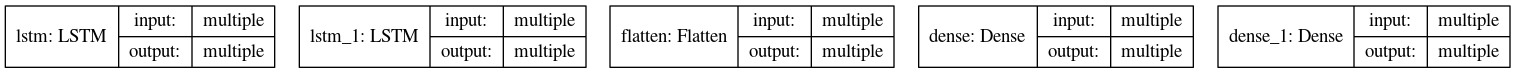

In [20]:
plot_model(model, show_shapes=True)

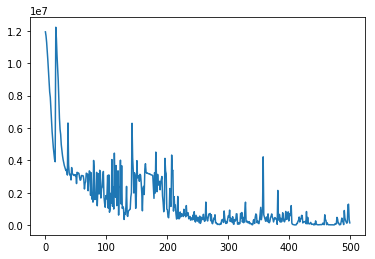

In [21]:
plt.plot(history.history['loss'])

In [22]:
model.evaluate(trainx, trainy)

3747/3747 [==============================] - 0s 69us/sample - loss: 3123416.0661 - accuracy: 0.0000e+00


[3123416.066088287, 0.0]

In [23]:
# test = np.array([0, 2, 4])
# test = np.reshape(test, [-1, 3, 1])
model.predict(testx).round()

array([[5868.],
       [5868.],
       [5868.],
       ...,
       [5873.],
       [5873.],
       [5873.]], dtype=float32)

In [24]:
testy

array([7500., 7502., 7504., ..., 9994., 9996., 9998.], dtype=float32)